### Import Modules

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')
print (labels[:5])
paths[:5]
        

Dataset is Loaded
['fear', 'fear', 'fear', 'fear', 'fear']


['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

### Creating a DataFrame

In [4]:
df=pd.DataFrame()
df['Speech']=paths
df['labels']=labels
df.head()

,Speech,labels
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [5]:
df['labels'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5595    False
5596    False
5597    False
5598    False
5599    False
Name: labels, Length: 5600, dtype: bool

In [6]:
print(df['labels'].dtype)

object


In [7]:
df['labels'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: labels, dtype: int64

## Explorartory Data Analysis

### Label Encoding

In [8]:
df['labels']# as the labels are object we need to convert then to int64 for plotting and other purpose so we use label encoding

0       fear
1       fear
2       fear
3       fear
4       fear
        ... 
5595      ps
5596      ps
5597      ps
5598      ps
5599      ps
Name: labels, Length: 5600, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the labels to numerical values
df['labels_encoded'] = label_encoder.fit_transform(df['labels'])



In [10]:
df['labels_encoded']# as this numerical values cant be plotted we change it into one hot vectors

0       2
1       2
2       2
3       2
4       2
       ..
5595    5
5596    5
5597    5
5598    5
5599    5
Name: labels_encoded, Length: 5600, dtype: int64

In [12]:
# Convert the encoded labels to one-hot vectors

one_hot_encoded = pd.get_dummies(df['labels'])
one_hot_encoded


,angry,disgust,fear,happy,neutral,ps,sad
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
5595,0,0,0,0,0,1,0
5596,0,0,0,0,0,1,0
5597,0,0,0,0,0,1,0
5598,0,0,0,0,0,1,0


<Axes: ylabel='count'>

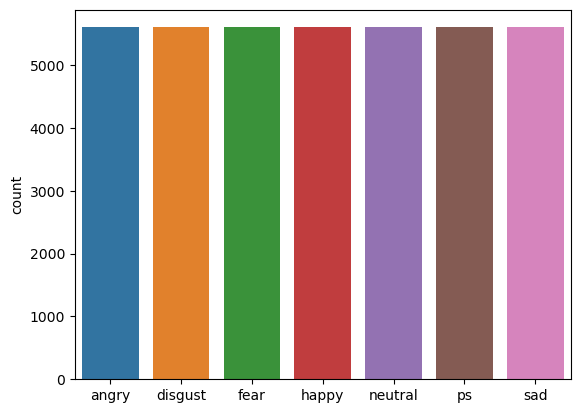

In [13]:
sns.countplot(one_hot_encoded)

In [14]:
df

,Speech,labels,labels_encoded
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
...,...,...,...
5595,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
5596,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
5597,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
5598,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5


### Wave plot and Spectogram

In [15]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    

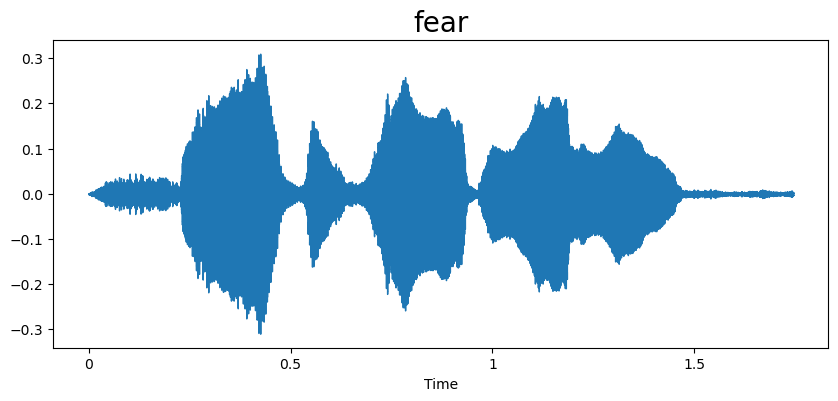

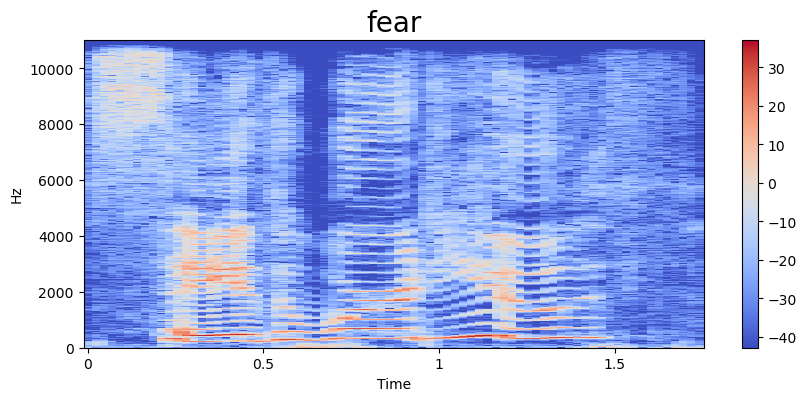

In [16]:
emotion='fear'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


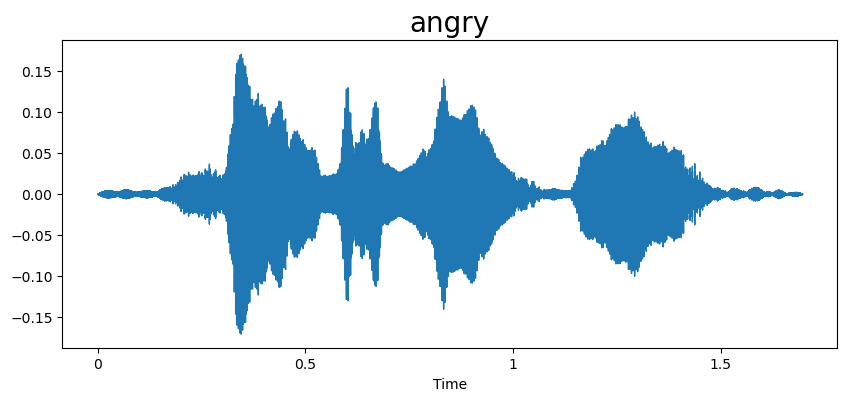

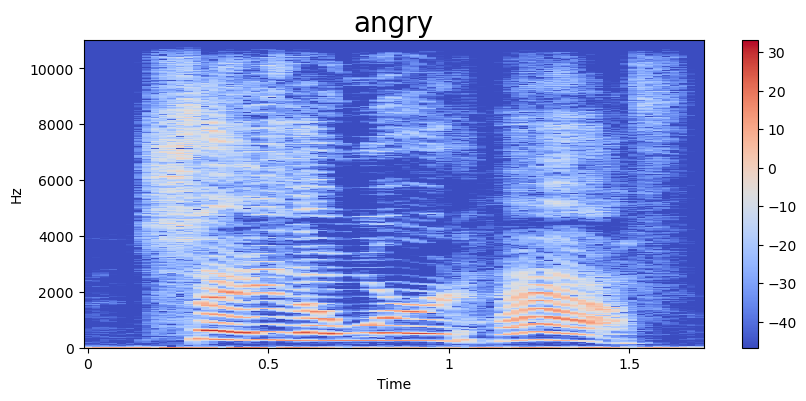

In [17]:
emotion='angry'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


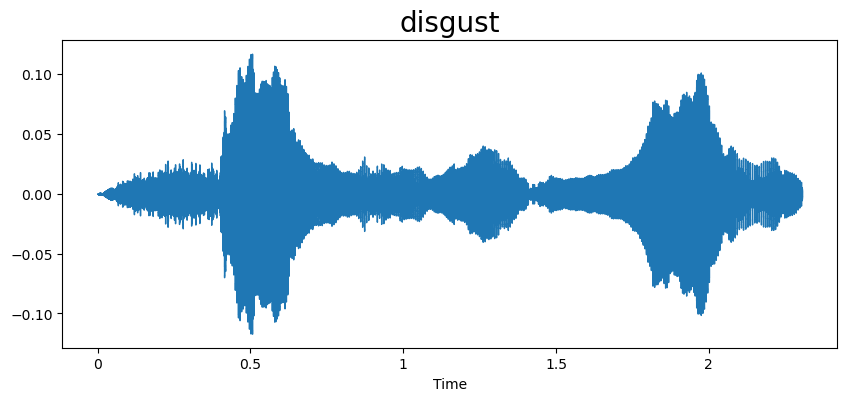

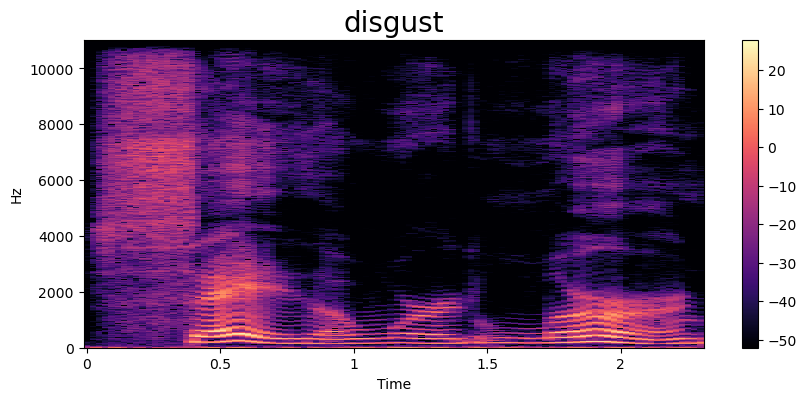

In [18]:
emotion='disgust'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


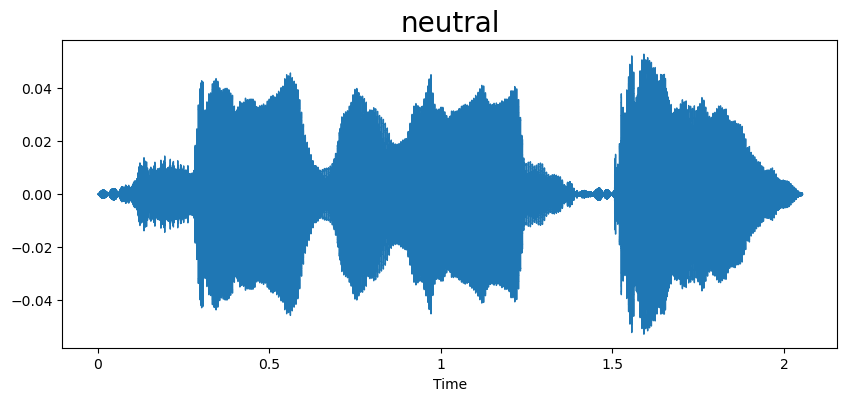

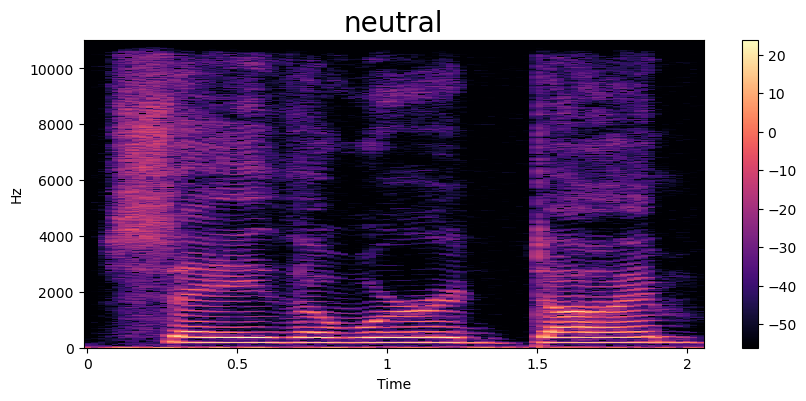

In [19]:
emotion='neutral'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


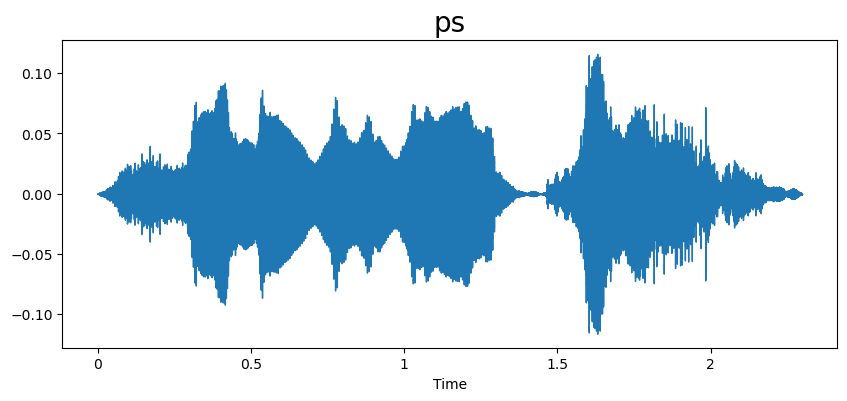

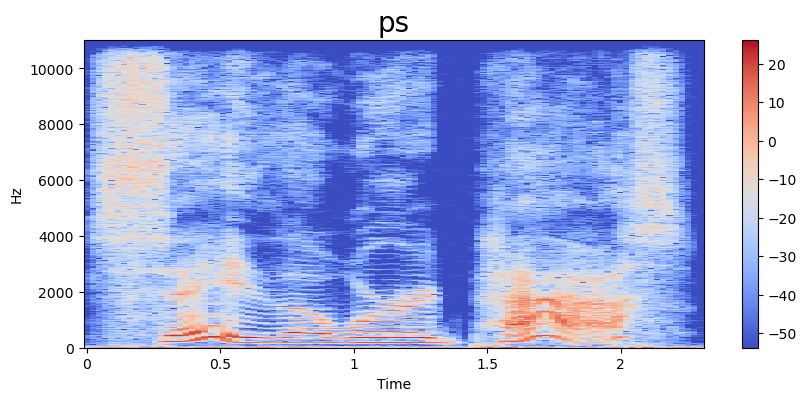

In [20]:
emotion='ps'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


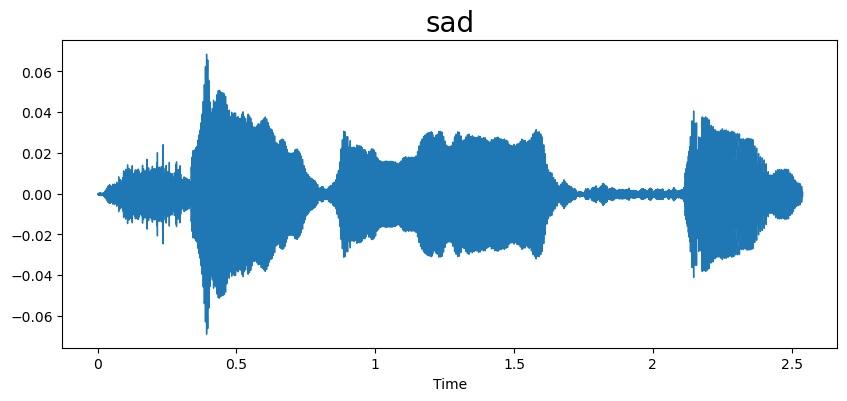

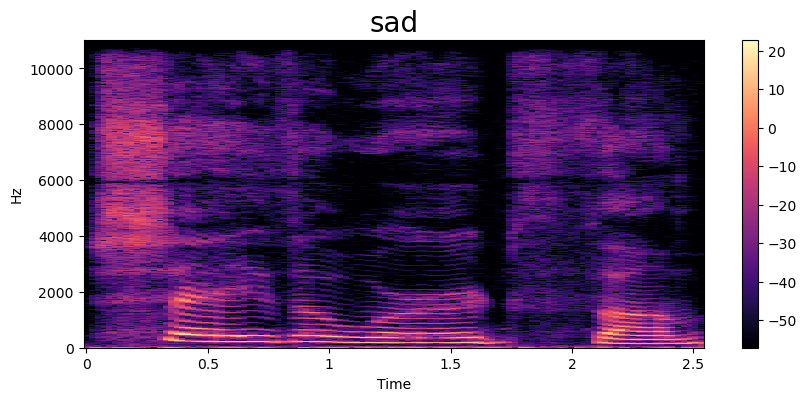

In [21]:
emotion='sad'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


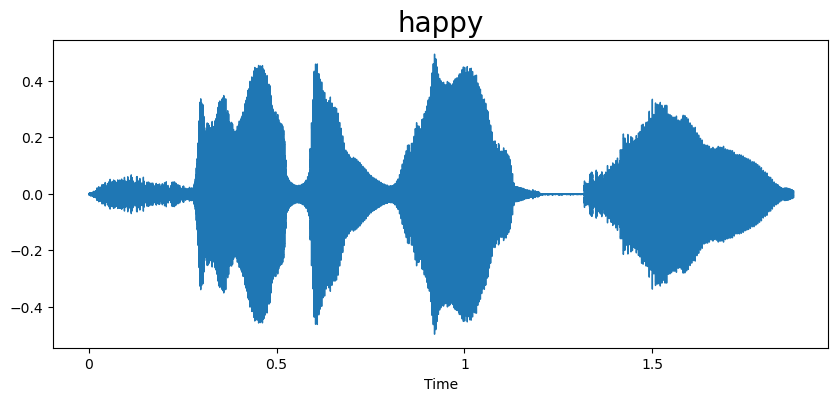

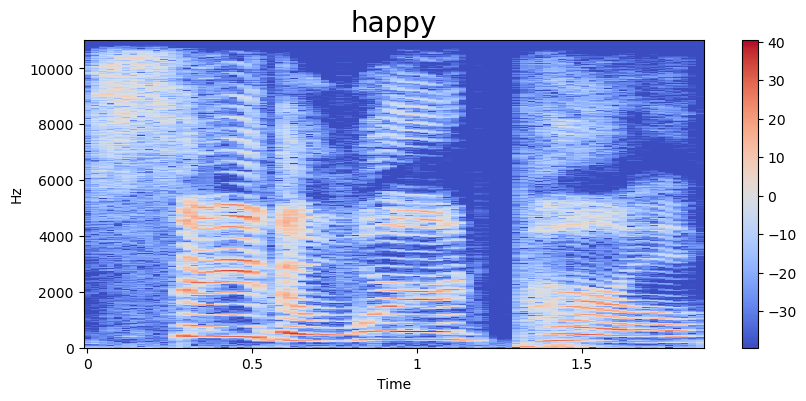

In [22]:
emotion='happy'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


### Feature Extraction

In [23]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [24]:
extract_mfcc(df['Speech'][6])

array([-383.90195   ,   53.061512  ,  -12.88248   ,   12.845002  ,
        -12.257006  ,   -4.3792872 ,   -1.9407741 ,   -6.118234  ,
        -18.106686  ,    8.854077  ,  -21.243792  ,    2.4039707 ,
          1.9022839 ,   -4.159431  ,    5.4572086 ,   -7.7048745 ,
         -5.797363  ,   14.678223  ,    5.2813516 ,   21.21919   ,
         22.785791  ,   10.599765  ,    2.6149752 ,    4.054955  ,
          0.95510006,   14.962217  ,   -2.6833384 ,    0.56843907,
         -9.098469  ,   -5.728311  ,   -2.4211388 ,    1.2561879 ,
        -10.902921  ,   -4.6303086 ,   -4.990393  ,    2.4980035 ,
          0.45733812,    3.3309157 ,    8.213271  ,    5.7722187 ],
      dtype=float32)

In [25]:
x_mfcc=df['Speech'].apply(lambda x:extract_mfcc(x))


In [26]:
x_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: Speech, Length: 5600, dtype: object

In [27]:
# change into a 2D array
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [28]:
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [29]:
from keras.utils import to_categorical
y=to_categorical(df['labels_encoded'])
y.shape

(5600, 7)

In [30]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Create the LSTM Model

In [31]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [32]:
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

## Train the model

In [33]:
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 7s 77ms/step - loss: 1.8225 - accuracy: 0.2797 - val_loss: 2.0048 - val_accuracy: 0.0812
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 1.5336 - accuracy: 0.4545 - val_loss: 1.9874 - val_accuracy: 0.1018
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 1.1696 - accuracy: 0.6232 - val_loss: 1.7055 - val_accuracy: 0.1437
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.8277 - accuracy: 0.7121 - val_loss: 1.2946 - val_accuracy: 0.3134
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6378 - accuracy: 0.7625 - val_loss: 1.0702 - val_accuracy: 0.5580
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.4924 - accuracy: 0.8196 - val_loss: 0.7001 - val_accuracy: 0.7304
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3850 - accuracy: 0.8623 - val_loss: 0.5716 - val_accuracy: 0.7866
Epoch 8/100
9/9 [===

### Plot the model

### Train and Val accuracy

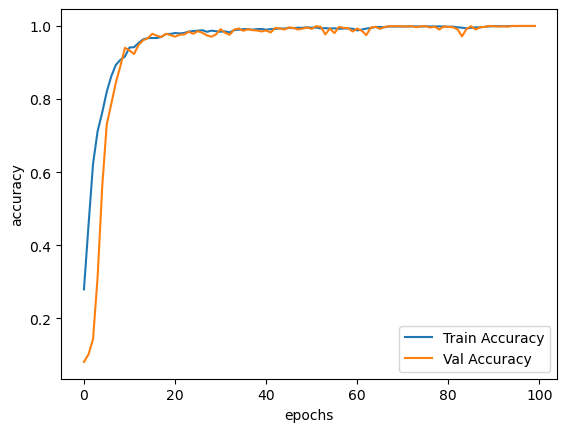

In [34]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='Train Accuracy')
plt.plot(epochs,val_acc,label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Loss

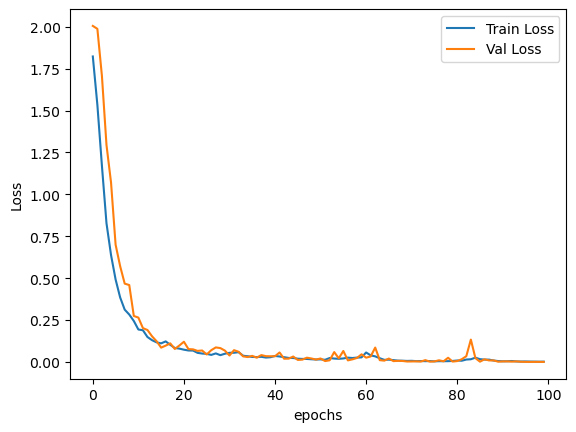

In [35]:
epochs=list(range(100))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Train Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()